# ディープニューラルネットワーク

In [1]:
# 必要なライブラリを読み込む
import numpy as np
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

- ScratchDeepNeuralNetrowkClassifierのfitメソッド内

In [2]:
# self.sigma : ガウス分布の標準偏差
# self.lr : 学習率
# self.n_nodes1 : 1層目のノード数
# self.n_nodes2 : 2層目のノード数
# self.n_output : 出力層のノード数

# optimizer = SGD(self.lr)
# self.FC1 = FC(self.n_features, self.n_nodes1, SimpleInitializer(self.sigma), optimizer)
# self.activation1 = Tanh()
# self.FC2 = FC(self.n_nodes1, self.n_nodes2, SimpleInitializer(self.sigma), optimizer)
# self.activation2 = Tanh()
# self.FC3 = FC(self.n_nodes2, self.n_output, SimpleInitializer(self.sigma), optimizer)
# self.activation3 = Softmax()

- イテレーションごとのフォワード

In [3]:
# A1 = self.FC1.forward(X)
# Z1 = self.activation1.forward(A1)
# A2 = self.FC2.forward(Z1)
# Z2 = self.activation2.forward(A2)
# A3 = self.FC3.forward(Z2)
# Z3 = self.activation3.forward(A3)

- イテレーションごとのバックワード

In [4]:
# dA3 = self.activation3.backward(Z3, Y) # 交差エントロピー誤差とソフトマックスを合わせている
# dZ2 = self.FC3.backward(dA3)
# dA2 = self.activation2.backward(dZ2)
# dZ1 = self.FC2.backward(dA2)
# dA1 = self.activation1.backward(dZ1)
# dZ0 = self.FC1.backward(dA1) # dZ0は使用しない

## 【問題1】全結合層のクラス化

全結合層のクラス化を行なってください。


以下に雛形を載せました。コンストラクタで重みやバイアスの初期化をして、あとはフォワードとバックワードのメソッドを用意します。重みW、バイアスB、およびフォワード時の入力Xをインスタンス変数として保持しておくことで、煩雑な入出力は不要になります。


なお、インスタンスも引数として渡すことができます。そのため、初期化方法のインスタンスinitializerをコンストラクタで受け取れば、それにより初期化が行われます。渡すインスタンスを変えれば、初期化方法が変えられます。


また、引数として自身のインスタンスselfを渡すこともできます。これを利用してself.optimizer.update(self)という風に層の重みの更新が可能です。更新に必要な値は複数ありますが、すべて全結合層が持つインスタンス変数にすることができます。



In [5]:
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        # 初期化
        self.optimizer = optimizer
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        #self.initializer = initializer
        
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W = initializer.W(self.n_nodes1, self.n_nodes2)
        self.B = initializer.B(self.n_nodes2)
        
        # 勾配更新の際に使用（AdaGradのみ）
        self.HW = 0
        self.HB = 0
        
        pass
    
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """ 
        
        # 逆伝播時に使用
        self.Z = X
        # 順伝播の計算部分の本体
      
        self.A = X @ self.W + self.B
        pass
        return self.A
    
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        # バイアス項の勾配
        self.dB = np.sum(dA,axis=0)
        # バイアス項以外の勾配
        self.dW =self.Z.T@dA
        # 逆伝播させる値
        self.dZ =dA@self.W.T
        # 重み更新
        self = self.optimizer.update(self)
        
        return self.dZ

## 【問題2】初期化方法のクラス化

初期化を行うコードをクラス化してください。


前述のように、全結合層のコンストラクタに初期化方法のインスタンスを渡せるようにします。以下の雛形に必要なコードを書き加えていってください。標準偏差の値（sigma）はコンストラクタで受け取るようにすることで、全結合層のクラス内にこの値（sigma）を渡さなくてすむようになります。



In [6]:
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        pass
        return W
    
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        B = self.sigma * np.random.randn(1, n_nodes2)
        pass
        return B

## 【問題3】最適化手法のクラス化

最適化手法のクラス化を行なってください。


最適化手法に関しても初期化方法同様に全結合層にインスタンスとして渡します。バックワードのときにself.optimizer.update(self)のように更新できるようにします。以下の雛形に必要なコードを書き加えていってください。


これまで扱ってきた最適化手法はSGDクラス（Stochastic Gradient Descent、確率的勾配降下法）として作成します。

In [7]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        # 
        layer.W -= self.lr * layer.dW / len(layer.Z)
        layer.B -= self.lr * layer.dB / len(layer.Z)
        return layer      

## 【問題4】活性化関数のクラス化

活性化関数のクラス化を行なってください。


ソフトマックス関数のバックプロパゲーションには交差エントロピー誤差の計算も含む実装を行うことで計算が簡略化されます。



In [8]:
class sigmoid:
    """シグモイド"""
    def forward(self,A):
        """
        順伝播
        --------
        A : 順伝播されてきた値
        """
        self.A = A
        Z = 1 / (1 + np.exp(-self.A))
        return Z
    
    def backward(self,dZ):
        """
        逆伝播
        --------
        dZ : 逆伝播されてきた値
        """
        dA = dZ * ((1 / ( 1 + np.exp(-sself.a))) - (1 / ( 1 + np.exp(-self.A)))**2)
        return dA

In [9]:
class Tanh:
    """tanh"""
    def forward(self,A):
        """
        順伝播
        --------
        A : 順伝播されてきた値
        """
        self.A = A
        Z = np.tanh(self.A)
        return Z
    
    def backward(self,dZ):
        """
        逆伝播
        --------
        dZ : 逆伝播されてきた値
        """
        dA = dZ * ( 1 - np.tanh(self.A)**2)
        return dA

In [23]:
class Softmax:
    """softmax"""
    def forward(self,A):
        """
        順伝播
        --------
        A : 順伝播されてきた値
        """
        Z = np.exp(A) / np.sum(np.exp(A),axis=1).reshape(-1,1)
        return Z
    
    def backward(self,Z,y):
        """
        逆伝播
        --------
        Z : 出力値
        y : 正解データ
        """
        # 逆伝播の値
        dA = Z - y
        # 損失
        loss = - np.sum(y * np.log(Z)) / len(y)
        return dA,loss

## 【問題5】ReLUクラスの作成

現在一般的に使われている活性化関数であるReLU（Rectified Linear Unit）をReLUクラスとして実装してください。


ReLUは以下の数式です。

$$
f(x) = ReLU(x) = (x) if x>0,(0) if x≦0.
$$

$x$ : ある特徴量。スカラー


実装上はnp.maximumを使い配列に対してまとめて計算が可能です。

一方、バックプロパゲーションのための $x$ に関する $f(x)$ の微分は以下のようになります。

$$
∂f(x)∂x= 1if x>0,0if x≦0.
$$

数学的には微分可能ではないですが、 $x=0$ のとき $0$ とすることで対応しています。


フォワード時の $x$ の正負により、勾配を逆伝播するかどうかが決まるということになります。

In [11]:
class ReLU:
    """relu"""
    def forward(self,A):
        """
        順伝播
        --------
        A : 順伝播されてきた値
        """
        self.A = A
        Z = np.maximum(0,A) # maximum関数=引数同士を比べて大きい値が返ってくる
        return Z
    
    def backward(self,dZ):
        """
        逆伝播
        --------
        dZ : 逆伝播されてきた値
        """
        # self.Aが0より大きければ、１をそれ以外の時は０を返す
        dA = dZ * np.where(self.A > 0,1,0)
        return dA

## 【問題6】重みの初期値

ここまでは重みやバイアスの初期値は単純にガウス分布で、標準偏差をハイパーパラメータとして扱ってきました。しかし、どのような値にすると良いかが知られています。シグモイド関数やハイパボリックタンジェント関数のときは Xavierの初期値 （またはGlorotの初期値）、ReLUのときは Heの初期値 が使われます。


XavierInitializerクラスと、HeInitializerクラスを作成してください。

### Xavierの初期値

Xavierの初期値における標準偏差 $\sigma$ は次の式で求められます。

$$
σ=1√n
$$
$n$ : 前の層のノード数



### Heの初期値

Heの初期値における標準偏差 $\sigma$ は次の式で求められます。

$$
σ=√2n
$$

$n$ : 前の層のノード数

In [12]:
class XavierInitializer:
    """Xavier"""
    def __init___(self,sigma):
        _ = sigma
        
    def W(self,n_nodes1,n_nodes2):
        """
        コンストラクタ
        --------
        n_nodes1 : 前の層のノード数
        n_nodes2 : 現在の層のノード数
        """
        self.sigma = 1 / np.sqrt(n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1,n_nodes2)
        return W
    
    def B(self,n_nodes2):
        """
        コンストラクタ
        --------
        n_nodes2 : 現在のノード数
        """
        B = self.sigma * np.random.randn(1,n_nodes2)
        return B

In [13]:
class HeInitializer:
    """He"""
    def __init__(self,sigma):
        _ = sigma
        
    def W(self,n_nodes1,n_nodes2):
        """
        コンストラクタ
        --------
        n_nodes1 : 前の層のノード
        n_nodes2 : 現在の層のノード
        """
        self.sigma = np.sqrt(2/n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1,n_nodes2)
        return W
    
    def B(self,n_nodes2):
        """
        コンストラクタ
        --------
        n_nodes2 : 現在の層のノード数
        """
        B = self.sigma * np.random.randn(1,n_nodes2)
        return B

## 【問題7】最適化手法

学習率は学習過程で変化させていく方法が一般的です。基本的な手法である AdaGrad のクラスを作成してください。


まず、これまで使ってきたSGDを確認します。

$$
W′_i=W_i−αE\frac{\partial L}{\partial W_i}
$$
$$
B′_i=B_i−αE\frac{\partial L}{\partial B_i}
$$

$\alpha$ : 学習率（層ごとに変えることも可能だが、基本的にはすべて同じとする）


$\frac{\partial L}{\partial W_i}$ : $W_i$ に関する損失 $L$ の勾配


$\frac{\partial L}{\partial B_i}$ : $B_i$ に関する損失 $L$ の勾配


$E()$ : ミニバッチ方向にベクトルの平均を計算



続いて、AdaGradです。バイアスの数式は省略しますが、重みと同様のことをします。


更新された分だけその重みに対する学習率を徐々に下げていきます。イテレーションごとの勾配の二乗和 $H$ を保存しておき、その分だけ学習率を小さくします。


学習率は重み一つひとつに対して異なることになります。

$$
H′_i=H_i+E\frac{\partial L}{\partial W_i}⊙ E\frac{\partial L}{\partial W_i}
$$
$$
W′_i=W_i−α\frac{1}{√H′_i}E\frac{\partial L}{\partial W_i}
$$

$H_i$ : i層目に関して、前のイテレーションまでの勾配の二乗和（初期値は0）


$H_i^{\prime}$ : 更新した $H_i$

In [14]:
# 確率的勾配降下方の実装
class AdaGrad:
    
    # インスタンス変数を定義
    def __init__(self,lr):
        self.lr = lr # 学習率
        
    # パラメータの更新メソッドを定義
    def update(self,layer):
        """
        コンストラクタ
        --------
        layer : layerインスタンス
        """
        layer.HW += layer.dW * layer.dW
        layer.HB += layer.dB * layer.dB
        # パラメータごとに値を更新
        delta = 1e-7#エラー対策
        layer.W -= self.lr * layer.dW /(np.sqrt(layer.HW) + delta)/ len(layer.Z)
        layer.B -= self.lr * layer.dB /(np.sqrt(layer.HB) + delta)/ len(layer.Z)
        return layer
        

## 【問題8】クラスの完成

任意の構成で学習と推定が行えるScratchDeepNeuralNetrowkClassifierクラスを完成させてください。

In [15]:
class GetMiniBatch:

    def __init__(self, X, y, batch_size = 20, seed=0):
        """通常のコンストラクタと同様の働き
        Parameters
        ----------
        X : 説明変数（画像の1次元データ）
        y : 目的変数（ラベル）
        batch_size : 必要なミニバッチのデータ数
        seed : ランダムシード固定
        """
        # ランダムシードの固定（学習ごとに同じ生成順）
        np.random.seed(seed)
        # バッチ数のメンバ変数
        self.batch_size = batch_size
        # データ全体の長さ分のインデックスをランダムに並べ替え
        # np.random.permutation:配列をランダムに並べ替え
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        # 並べ替えたインデックスと同じ順番で説明変数と目的変数を並べ替え
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        # データ数をバッチ数で割って、何回呼び出せば、全データを学習したことになるかの判定
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop
    
    def __iter__(self):
        # 何回目の呼び出しか
        self._counter = 0
        return self

    def __next__(self):
        # 全データを学習すればストップ
        if self._counter >= self._stop:
            raise StopIteration()
        # 並び変えた_X,_yの何番目のインデックスを採用するか
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        # returnする前にカウンタに+1しておく
        self._counter += 1
        # 説明変数と目的変数を返す
        return self._X[p0:p1], self._y[p0:p1]

In [32]:
class ScratchDeepNeuralNetrowkClassifier():

    def __init__(self,batch_size=20,n_features=784,n_nodes1 =400,n_nodes2 = 200,n_output =10,lr =0.005,epoch=10,sigma=0.02,optimizer=SGD, initializer=HeInitializer,activater=ReLU,output_activater=Softmax,verbose=True):
        """コンストラクタ
        Parameters
        ----------
        batch_size : バッチサイズ（default:20)
        n_features : 説明変数の数（default:784)
        n_nodes1 : 前の層のノード数（default:400)
        n_nodes2 : 当該層のノード数（default:200)
        n_output : 出力層のノード数（default:10)
        sigma : 初期化時のパラメータ（default:0.02)
        lr : 学習率（default:0.005)
        verbose : 計算過程の出力（default:True)
        epoch : 学習回数（default:10)
        optimizer : 最適化手法（default:SGD)
        initializer : 初期化方法（default:HeInitializer）
        activater : 活性化関数（default:ReLU）
        """
        self.batch_size = batch_size
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.lr = lr
        self.epoch = epoch
        self.optimizer = optimizer
        self.sigma = sigma
        self.initializer = initializer
        self.activater = activater
        self.output_activater = output_activater
        self.verbose = verbose
        
    def fit(self,X,y,X_val=None,y_val=None):
        """
        学習
        --------
        X : 訓練データの説明変数
        y : 訓練データの目的変数
        X_val : 評価データの説明変数
        y_val : 評価データの目的変数
        """
        
        # lossの記録用配列
        self.loss_train = []
        self.loss_val = []
        
        # 最適化手法の初期化
        optimizer = self.optimizer(self.lr)
        
        # 各層の初期化
        self.FC1 = FC(self.n_features,self.n_nodes1,self.initializer(self.sigma),optimizer)
        self.activation1 = self.activater()
        self.FC2 = FC(self.n_nodes1,self.n_nodes2,self.initializer(self.sigma),optimizer)
        self.activation2 = self.activater()
        self.FC3 = FC(self.n_nodes2,self.n_output,self.initializer(self.sigma),optimizer)
        self.activation3 = self.output_activater()
        
        # 学習回数分ループ
        for i in range(self.epoch):
            # ミニバッチイテレータ生成
            get_mini_batch = GetMiniBatch(X,y,batch_size=self.batch_size,seed=i)
            
            # ミニバッチイテレータループ
            for mini_X,mini_y in get_mini_batch:
                ## 順伝播
                """１層目"""
                A1 = self.FC1.forward(mini_X)
                Z1 = self.activation1.forward(A1)
                
                """２層目"""
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                
                """３層目"""
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)
                
                ## 逆伝播
                dA3,loss = self.activation3.backward(Z3,mini_y)
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1)
                
            # 通過出力
            if self.verbose:
                ## 順伝播
                """１層目"""
                A1 = self.FC1.forward(X)
                Z1 = self.activation1.forward(A1)
                
                """２層目"""
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                
                """３層目"""
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)
                
                # 損失計算と記録
                loss = self.activation3.backward(Z3,y)[1]
                self.loss_train.append(loss)
                print(i,loss)
                
                # 評価データを見る
                if X_val is not None:
                    ## 順伝播
                    """１層目"""
                    A1 = self.FC1.forward(X_val)
                    Z1 = self.activation1.forward(A1)
                    
                    """２層目"""
                    A2 = self.FC2.forward(Z1)
                    Z2 = self.activation2.forward(A2)
                    
                    """３層目"""
                    A3 = self.FC3.forward(Z2)
                    Z3 = self.activation3.forward(A3)
                    
                    # 損失計算と記録
                    self.loss_val.append(self.activation3.backward(Z3,y_val)[1])
                    
    def predict(self,X):
        """
        予測
        --------
        X : 入力配列
        """
        # 順伝播
        """1層目"""
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)

        """２層目"""
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)

        """３層目"""
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)

        # 最も大きいインデックスを採用
        return np.argmax(Z3,axis=1)


## 【問題9】学習と推定

層の数や活性化関数を変えたいくつかのネットワークを作成してください。そして、MNISTのデータを学習・推定し、Accuracyを計算してください。

In [17]:
# 読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 画像データ→行データ
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# 正規化
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

# 分割(訓練データ・評価データ
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# one-hotベクトル化
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_val[:, np.newaxis])

In [33]:
dnn = ScratchDeepNeuralNetrowkClassifier(epoch=100) 

dnn.fit(X_train[:4000], y_train_one_hot[:4000], X_val[:2000], y_test_one_hot[:2000])

0 1.2881794350390807
1 0.7971158909095009
2 0.5991456777002023
3 0.4999276653667498
4 0.44215152877821207
5 0.4003154254156251
6 0.36395891650811785
7 0.3412018818521649
8 0.3186649025267526
9 0.3019268084831267
10 0.2903831637548931
11 0.27427279538313903
12 0.262736069310421
13 0.25158179908151823
14 0.24288484045389191
15 0.23129781494829604
16 0.2258765613126353
17 0.21725473787762103
18 0.209149770916316
19 0.2029759653108972
20 0.1948866461423655
21 0.19256616144147914
22 0.18234379396945238
23 0.17981474183847138
24 0.17109258092914692
25 0.1673770312625774
26 0.1626155313204266
27 0.1579622837426295
28 0.1512574476825076
29 0.14843367423128462
30 0.14256800420172572
31 0.13916564503969892
32 0.1349197030567693
33 0.13332751170576024
34 0.12854291089736175
35 0.12424178814213561
36 0.12038339442348772
37 0.11796839110368362
38 0.1143324403070811
39 0.11116668999984089
40 0.10825010101258513
41 0.10577920884100261
42 0.10256357047208543
43 0.10079485482799802
44 0.097432946238868

In [34]:
pred = dnn.predict(X_val)
accuracy_score(y_val, pred)

0.9274166666666667

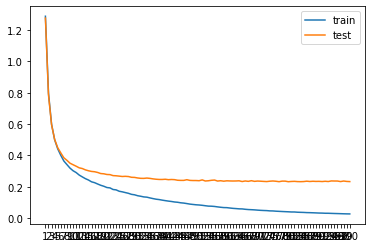

In [35]:
plt.plot(list(range(1, dnn.epoch+1)), dnn.loss_train, label='train')
plt.plot(list(range(1, dnn.epoch+1)), dnn.loss_val, label='test')
plt.legend()
plt.xticks(list(range(1, dnn.epoch+1)));